<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [3]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
### Author : Vasista
### Date   : 17/11/2018

# Import Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Load Dataset and Merging

In [5]:
dataX = pd.read_csv('C:\\Users\\HP\\Desktop\\Mith\\train.csv')
dataY = pd.read_csv('C:\\Users\\HP\\Desktop\\Mith\\trainlabels.csv')
data = pd.merge(dataX, dataY, left_on='Id', right_on='id', how='left').drop('id', axis=1)
data_copy = data.copy()             # Copy of original Data
data.info()
data.head()

data.to_csv('C:\\Users\\HP\\Desktop\\Mith\\water_data.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44068 entries, 0 to 44067
Data columns (total 35 columns):
Id                       44068 non-null int64
Amount_of_water          44068 non-null float64
Gps_height               44068 non-null int64
Waterpointname           44068 non-null object
Waterpoint_type          44068 non-null object
Basin_name               44068 non-null object
Village                  44068 non-null object
Regionname               44068 non-null object
Region_code              44068 non-null int64
Wardname                 44068 non-null object
District_code            44068 non-null int64
Population               44068 non-null int64
Public_meeting           41543 non-null object
Organization_funding     41468 non-null object
Organization_surveyed    44068 non-null object
Scheme_management        41138 non-null object
SchemeName               23117 non-null object
Permit                   41841 non-null object
Company_installed        41465 non-null object
Ma

In [5]:
print(data.info())
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44068 entries, 0 to 44067
Data columns (total 35 columns):
Id                       44068 non-null int64
Amount_of_water          44068 non-null float64
Gps_height               44068 non-null int64
Waterpointname           44068 non-null object
Waterpoint_type          44068 non-null object
Basin_name               44068 non-null object
Village                  44068 non-null object
Regionname               44068 non-null object
Region_code              44068 non-null int64
Wardname                 44068 non-null object
District_code            44068 non-null int64
Population               44068 non-null int64
Public_meeting           41543 non-null object
Organization_funding     41468 non-null object
Organization_surveyed    44068 non-null object
Scheme_management        41138 non-null object
SchemeName               23117 non-null object
Permit                   41841 non-null object
Company_installed        41465 non-null object
Ma

Id                           0
Amount_of_water              0
Gps_height                   0
Waterpointname               0
Waterpoint_type              0
Basin_name                   0
Village                      0
Regionname                   0
Region_code                  0
Wardname                     0
District_code                0
Population                   0
Public_meeting            2525
Organization_funding      2600
Organization_surveyed        0
Scheme_management         2930
SchemeName               20951
Permit                    2227
Company_installed         2603
Management                   0
Management_group             0
Extraction_type              0
Extraction_type_group        0
Extraction_type_class        0
Payment                      0
Payment_type                 0
Water_quality                0
Quality_group                0
Quantity                     0
Quantity_group               0
Source                       0
Source_type                  0
Source_c

# Initial Data Understanding

## Univariate Analysis

### Understanding Target Variable

In [6]:
data['Status'].value_counts()

functional        25808
non functional    18260
Name: Status, dtype: int64

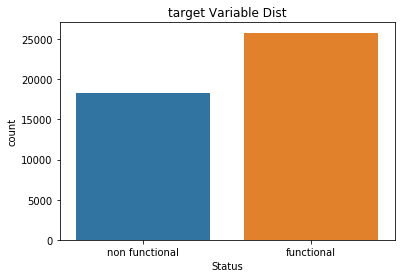

In [7]:
sns.countplot(x=data['Status'])
plt.title("target Variable Dist")
plt.show()

### Understanding Other Variables

In [8]:
print(data['Water_quality'].value_counts())
print("\n", data['Quantity'].value_counts())
print("\n", data['Quality_group'].value_counts())
print("\n", data['Quantity_group'].unique())
print("\n", data['Organization_funding'].value_counts())
print("\n", data['Waterpoint_type_group'].value_counts())
print("\n", data['Waterpoint_type'].value_counts())
print("\n", data['Company_installed'].value_counts())
print("\n", data['Waterpointname'].value_counts())

soft                  37551
salty                  3700
unknown                1445
milky                   633
coloured                358
salty abandoned         211
fluoride                154
fluoride abandoned       16
Name: Water_quality, dtype: int64

 enough          24610
insufficient    10982
dry              4943
seasonal         2930
unknown           603
Name: Quantity, dtype: int64

 good        37551
salty        3911
unknown      1445
milky         633
colored       358
fluoride      170
Name: Quality_group, dtype: int64

 ['insufficient' 'enough' 'dry' 'seasonal' 'unknown']

 Iorg1388    5246
Org_1409    4636
Org_1233    1411
Org_1460    1049
Org_970      687
0            622
Org_1653     582
Org_566      564
Org_972      452
Org_1270     443
Org_859      420
Iorg1256     372
Org_1261     367
Org_761      360
Org_316      335
Org_1873     334
Org_775      317
Iorg1202     314
Iorg1310     310
Iorg1510     297
Org_1309     276
Org_135      268
Org_436      256
Org_938  

In [9]:
print("\n", data["Scheme_management"].value_counts())
print("\n", data["Village"].value_counts())
print("\n", data["Basin_name"].value_counts())
print("\n", data["Regionname"].value_counts())
print("\n", data["Wardname"].value_counts())
print("\n", data["Extraction_type"].value_counts())
print("\n", data["Extraction_type_group"].value_counts())
print("\n", data["Extraction_type_class"].value_counts())
    



 VWC                 27563
WUG                  3591
Water authority      2160
WUA                  2143
Water Board          2113
Parastatal           1207
Private operator      839
Company               797
Other                 598
SWC                    76
Trust                  50
None                    1
Name: Scheme_management, dtype: int64

 village18166    382
village8556     373
village17891    361
village1        289
village14666    257
village384      205
village870      188
village17748    156
village4318     131
village3111     128
village2011     120
village8727     111
village3699     109
village1000      99
village2379      97
village14908     93
village12326     84
village14341     81
village2762      79
village2757      78
village5196      75
village2645      74
village3020      73
village18695     73
village10127     71
village17784     70
village11036     70
village3805      69
village15021     67
village11107     66
               ... 
village13883      1
villag

In [10]:
print("\n", data["Region_code"].value_counts())


 11    4193
17    3456
12    3357
3     3218
5     3010
18    2397
2     2290
19    2283
10    1984
4     1949
16    1766
1     1572
13    1570
14    1551
20    1548
15    1357
6     1288
21    1172
80     916
60     803
90     647
7      646
99     322
9      288
24     257
8      227
40       1
Name: Region_code, dtype: int64


### Numeric Variables

In [9]:
print(data['Amount_of_water'].describe())
print("\n", data['Gps_height'].describe())
print("\n", data['Population'].describe())
print("\n", data['Region_code'].describe())
print("\n", data['District_code'].describe())
list11 = data.Population.sort_values(ascending=True).tolist()
list11[43672]

count     44068.000000
mean       5098.604430
std        2869.667544
min        5000.000000
25%        5000.000000
50%        5000.000000
75%        5000.000000
max      350000.000000
Name: Amount_of_water, dtype: float64

 count    44068.0
mean      5000.0
std          0.0
min       5000.0
25%       5000.0
50%       5000.0
75%       5000.0
max       5000.0
Name: Gps_height, dtype: float64

 count    44068.000000
mean      5003.626849
std        149.661668
min       5000.000000
25%       5000.000000
50%       5000.000000
75%       5000.000000
max      30500.000000
Name: Population, dtype: float64

 count    44068.000000
mean        15.224539
std         17.566722
min          1.000000
25%          5.000000
50%         12.000000
75%         17.000000
max         99.000000
Name: Region_code, dtype: float64

 count    44068.000000
mean         5.664382
std          9.670612
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         80.000000
Name: 

5000

# Data Preprocessing

In [10]:
## Imputing OutLiers

data['Amount_of_water'] = data.Amount_of_water.where(data.Amount_of_water > 5000, 5000)
data['Gps_height'] = data.Gps_height.where(data.Gps_height > 5000, 5000)
data['Population'] = data.Population.where(data.Population > 5000, 5000)

## Droping Colunns Having More Than 20% Missing Values and Id Column.

### Percentage Of Missing Values For Each Column

In [11]:
columns = data.columns
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({'percent_missing': percent_missing})

### Dropping Columns 

In [12]:
data = data.drop(labels=['Id'], axis=1)       # Dropped Id column

### Removing Columns Having More Categories and Repeated Columns.

### Note:  Removing These Features Removed After Checking In Model Importance Only.

In [13]:
data_new = data.drop(labels=['Organization_funding', "Company_installed", "Scheme_management", 'SchemeName',
                            'Waterpointname','Waterpoint_type_group', 'Village',
                            "Wardname", "Extraction_type", "Extraction_type_group", 'District_code'], axis=1)


## Filling Missing Values

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
data1 = imputer.fit_transform(data_new)
data1 = pd.DataFrame(data1)


In [15]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,5000,5000,hand pump,basin3,region4,15,5000,False,DataConsultantLtd,False,...,never pay,never pay,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,non functional
1,5000,5000,communal standpipe multiple,basin7,region5,10,5000,False,DataConsultantLtd,True,...,pay monthly,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,non functional
2,5000,5000,communal standpipe,basin1,region6,17,5000,True,DataConsultantLtd,True,...,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,non functional
3,5000,5000,other,basin5,region13,18,5000,True,DataConsultantLtd,True,...,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,non functional
4,5000,5000,hand pump,basin4,region6,14,5000,True,DataConsultantLtd,True,...,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,functional


## Label Encoding

In [16]:
from sklearn import preprocessing

# Encoding Data
encoder = preprocessing.LabelEncoder()
data2 = data1.apply(encoder.fit_transform)  


In [17]:
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,4,2,15,14,0,0,0,0,...,0,2,4,4,2,2,7,5,0,1
1,0,0,2,6,16,9,0,0,0,1,...,3,1,6,2,2,2,6,4,1,1
2,0,0,1,0,17,16,0,1,0,1,...,0,2,6,2,2,2,3,0,0,1
3,0,0,6,4,4,17,0,1,0,1,...,0,2,6,2,2,2,7,5,0,1
4,0,0,4,3,17,13,0,1,0,1,...,0,2,6,2,1,1,3,0,0,0


### Seperating Target Variable.

In [18]:
X = data2.iloc[:, 0:-1]
Y = data2.iloc[:, -1]

In [19]:
print(Y.head())
X.head()

0    1
1    1
2    1
3    1
4    0
Name: 22, dtype: int32


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0,0,4,2,15,14,0,0,0,0,...,1,0,2,4,4,2,2,7,5,0
1,0,0,2,6,16,9,0,0,0,1,...,0,3,1,6,2,2,2,6,4,1
2,0,0,1,0,17,16,0,1,0,1,...,6,0,2,6,2,2,2,3,0,0
3,0,0,6,4,4,17,0,1,0,1,...,3,0,2,6,2,2,2,7,5,0
4,0,0,4,3,17,13,0,1,0,1,...,1,0,2,6,2,1,1,3,0,0


## One Hot Encoding

In [20]:
data3 = pd.get_dummies(data_new.loc[:, data_new.columns != 'Status'])


In [21]:
data3.shape

(44068, 128)

## Applying PCA On Data3

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)
X_pca.shape

(44068, 20)

# Finding ImPortant Features

## With Random Forest

### Using Label Encoded Data

In [23]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators = 15, max_features = 'auto')        # for None, it takes n-features
RFC.fit(X, Y)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
RFC.feature_importances_

array([0.00251964, 0.        , 0.11327607, 0.06442111, 0.0627462 ,
       0.06414033, 0.00094282, 0.01676934, 0.        , 0.0293186 ,
       0.05287448, 0.0243505 , 0.08513244, 0.05016981, 0.03923162,
       0.01953671, 0.02476586, 0.142753  , 0.1289294 , 0.03920233,
       0.02861418, 0.01030558])

In [25]:
X_cols = data_new.loc[:, data_new.columns != 'Status']

,columns,imp_features
0,Amount_of_water,0.002520
1,Gps_height,0.000000
2,Waterpoint_type,0.113276
3,Basin_name,0.064421
4,Regionname,0.062746
5,Region_code,0.064140
6,Population,0.000943
7,Public_meeting,0.016769
8,Organization_surveyed,0.000000
9,Permit,0.029319


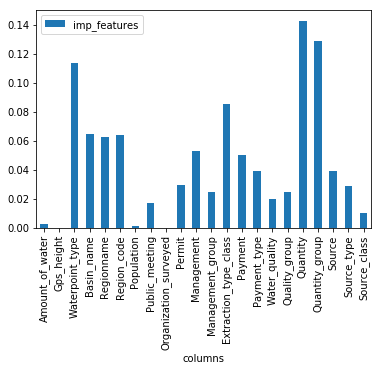

In [26]:
feature_imp_RFC = pd.DataFrame({"imp_features":RFC.feature_importances_, "columns":X_cols.columns})
feature_imp_RFC.plot.bar(x="columns", y="imp_features")
feature_imp_RFC

### Making main_features as Column

In [27]:
main_features = dataX[["Amount_of_water", "Gps_height", "Waterpoint_type",'Population', "Payment", "Quantity_group", "Source"]]    #[Amount_of_water, Gps_height, Waterpoint_type, Population, Payment, Quantity_group, Source]
main_features.head()

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
final_data = imputer.fit_transform(main_features)
final_data = pd.DataFrame(final_data)

encoder = preprocessing.LabelEncoder()
final_data1 = final_data.apply(encoder.fit_transform)  

In [28]:
final_data1.head()
final_data1.rename(columns={'0': 'Amount_of_water', '1': 'Gps_height', "2":"Waterpoint_type",
                           '3': 'Population', '4': 'Payment', "5":"Quantity_group",
                           '6':"Source"}, inplace=True)

# Train Test Split (Stratified)

In [29]:

# For Main_Features
train1 = final_data1
trainX1, valX1, trainY1, valY1 = train_test_split(train1, dataY['Status'], random_state=5, test_size=0.25, shuffle=True)


# For One PCA OneHot Encoded Data
train = X_pca
trainX2, valX2, trainY2, valY2 = train_test_split(train, dataY['Status'], random_state=5, test_size=0.25, shuffle=True)

In [39]:
from sklearn.tree import DecisionTreeClassifier

tree_learner = DecisionTreeClassifier(min_samples_split = 7, min_samples_leaf= 2, max_depth= 19)
tree_learner.fit(trainX1, trainY1)
print(tree_learner.score(trainX1, trainY1))
yp = tree_learner.predict(valX1)
accuracy_score(yp, valY1)

0.6216453359958851


0.5687573749659617

# Model Building

## With Main_Features

###  Decision Trees with Tuning Using GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {'min_samples_split':range(2,15,1), 
          'min_samples_leaf':range(1,10,1),
          'max_depth':range(5,20,1)
          }

tree_learner = RandomizedSearchCV()
grid_cv1 = GridSearchCV(tree_learner, params, cv=10, n_jobs=-1)
grid_cv1.fit(trainX1, trainY1)
print("Train Score  ",grid_cv1.score(trainX1, trainY1))

y_caps1 = grid_cv1.predict(valX1)
print("Test Score   ", accuracy_score(valY1, y_caps1))
    

In [ ]:
print("Best Hyper Parameters:",grid_cv1.best_params_)
print("Best Accuracy:",grid_cv1.best_score_)
print('Test Accuracy',accuracy_score(valY1, y_caps1))

# Final Model

## On Testing Data

In [101]:
test = pd.read_csv('C:\\Users\\HP\\Desktop\\Mith\\test.csv')

test_imp = test[["Amount_of_water", "Gps_height", "Waterpoint_type",'Population', "Payment", "Quantity_group", "Source"]]
Y_final = test[['Source']]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
data_final = imputer.fit_transform(test_imp)
data_final = pd.DataFrame(data_final)

encoder = preprocessing.LabelEncoder()
data_final1 = data_final.apply(encoder.fit_transform)  

In [ ]:
tree_learner = DecisionTreeClassifier(min_samples_split = 7, min_samples_leaf= 2, max_depth= 19)
tree_learner.fit(main_features, dataY['Status'])
tree_learner.score(data_final1, Y_final)

### Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    "learning_rate": [0.01, 0.025, 0.1, 0.2],
    "max_depth":[3,4,5,6,7,8],
    "subsample":[0.5, 0.8, 1.0],
    "n_estimators":[10]
    }

gbc = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=10,subsample=0.5)

gbc.fit(trainX2,trainY2)
print("Train Accuracy ", gbc.score(trainX2, trainY2))


y_predictions = gbc.predict(valX2)
print("Test Accuracy  ", accuracy_score(valY2, y_predictions))



Train Accuracy  0.5876372878279024
Test Accuracy   0.5871834437687211


In [42]:
print("Best hyperparameter:\n", clf.best_params_)

print(confusion_matrix(valY1,y_predictions))
print(classification_report(valY1, y_predictions))

Best hyperparameter:
 {'subsample': 0.5, 'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.2}
[[6451   19]
 [4539    8]]
                precision    recall  f1-score   support

    functional       0.59      1.00      0.74      6470
non functional       0.30      0.00      0.00      4547

     micro avg       0.59      0.59      0.59     11017
     macro avg       0.44      0.50      0.37     11017
  weighted avg       0.47      0.59      0.44     11017



### SVM

In [ ]:
params = {'C': [6,7,8,9,10,11,12], 'kernel': ['linear','rbf']}

svm = SVC(gamma='scale')
grid_cv4 = RandomizedSearchCV(svm, params, cv=10, n_jobs=-1)
grid_cv4.fit(trainX, trainY) 
print("Train Score ", grid_cv4.score(trainX,trainY))

y_p = grid_cv4.predict(valX)
print("Test Score  ", accuracy_score(valY , y_p))



In [ ]:
print("Best Hyper Parameters:\n",grid_cv4.best_params_)
print(confusion_matrix(valY,y_p))
print(classification_report(valY, y_p))